## Objective

The purpose of this notebook is to explore how we can do inference on Discrete BNs using Pgmpy and how to display the CPTs and the structure.

We an example BN here, but there are other "common" BN examples. We have a repository here:

https://www.bnlearn.com/bnrepository/

We can also manually create our own examples either fully synhetic with random variable names or with a combination of synthetic + LLMs / manual

We can also train a BN using a well-known dataset or a synthetic one.

In [2]:
import sys
import networkx as nx
from pathlib import Path

from pgmpy.utils import get_example_model
from pgmpy.inference import VariableElimination

# Set the base path
base_path = Path("../../")  # One level up from the current working directory

# Add the src/ directory to sys.path using base_path
sys.path.append(str((base_path / "src").resolve()))

from bn_utils import draw_bayesian_network
from discrete.discrete_inference import format_probability_query, query_probability

In [3]:
# Load the ASIA network example
model = get_example_model("asia")

# Print the model structure (nodes and edges)
print("Nodes in the network:", model.nodes())
print("Edges in the network:", model.edges())
print("\n" + "="*50 + "\n")

# Collect CPDs into a single string
cpd_strings = []
for cpd in model.get_cpds():
    cpd_strings.append(str(cpd))

# Join them with double newlines
cpds_as_string = "\n\n".join(cpd_strings)

# If you want to check
print(cpds_as_string)

Nodes in the network: ['asia', 'tub', 'smoke', 'lung', 'bronc', 'either', 'xray', 'dysp']
Edges in the network: [('asia', 'tub'), ('tub', 'either'), ('smoke', 'lung'), ('smoke', 'bronc'), ('lung', 'either'), ('bronc', 'dysp'), ('either', 'xray'), ('either', 'dysp')]


+-----------+------+
| asia(yes) | 0.01 |
+-----------+------+
| asia(no)  | 0.99 |
+-----------+------+

+------------+------------+-----------+
| smoke      | smoke(yes) | smoke(no) |
+------------+------------+-----------+
| bronc(yes) | 0.6        | 0.3       |
+------------+------------+-----------+
| bronc(no)  | 0.4        | 0.7       |
+------------+------------+-----------+

+-----------+-------------+------------+-------------+------------+
| bronc     | bronc(yes)  | bronc(yes) | bronc(no)   | bronc(no)  |
+-----------+-------------+------------+-------------+------------+
| either    | either(yes) | either(no) | either(yes) | either(no) |
+-----------+-------------+------------+-------------+------------+
| dy

## Draw the structure

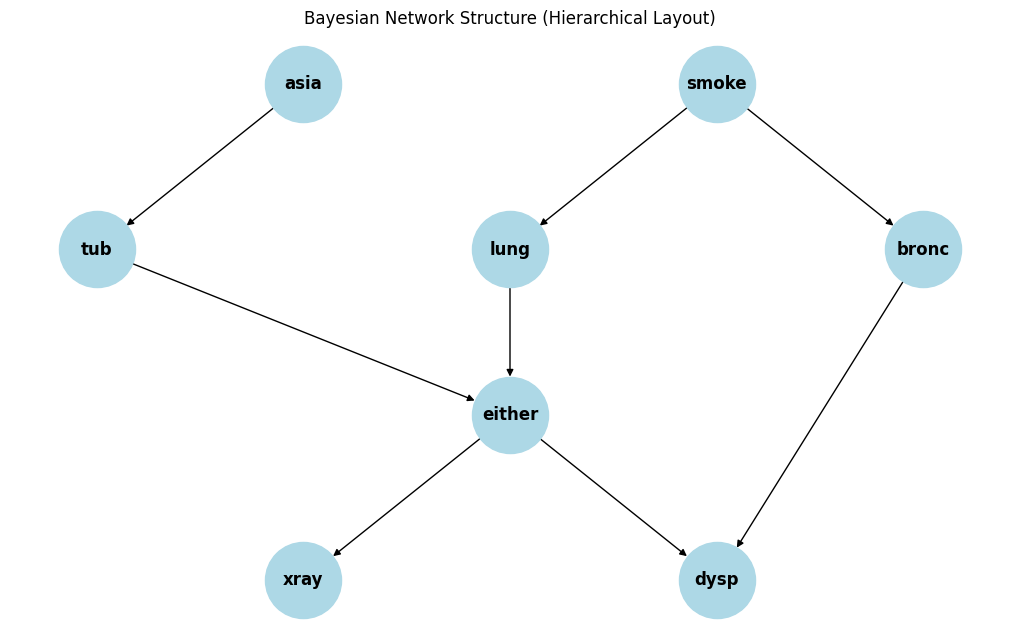

In [4]:
draw_bayesian_network(model)

## Inference example

In [5]:
# Create inference object
infer = VariableElimination(model)

In [6]:
# -------------------------------
# 1️⃣ Single evidence
query = infer.query(variables=['dysp'], evidence={'smoke': 'no'})
print("P(Dysp | Smoke = no):")
print(query)
print("\n" + "-"*50 + "\n")

P(Dysp | Smoke = no):
+-----------+-------------+
| dysp      |   phi(dysp) |
+===========+=============+
| dysp(yes) |      0.3191 |
+-----------+-------------+
| dysp(no)  |      0.6809 |
+-----------+-------------+

--------------------------------------------------



In [7]:

# -------------------------------
# 3️⃣ Three evidences
query = infer.query(variables=['dysp'], evidence={'smoke': 'yes', 'asia': 'no', 'tub': 'yes'})
print("P(Dysp | Smoke = yes, Asia = no, Tub = yes):")
print(query)

P(Dysp | Smoke = yes, Asia = no, Tub = yes):
+-----------+-------------+
| dysp      |   phi(dysp) |
+===========+=============+
| dysp(yes) |      0.8200 |
+-----------+-------------+
| dysp(no)  |      0.1800 |
+-----------+-------------+


### Example for query with specific value

In [8]:
# Examples:
evidence = {'smoke': 'yes', 'asia': 'no', 'tub': 'yes'}

# Get the query string
query_str = format_probability_query('dysp', 'no', evidence)
prob = query_probability(infer, 'dysp', 'no', evidence)
print(f"Query: {query_str}")
print(f"Result: {prob:.4f}")

# Another example
query_str2 = format_probability_query('dysp', 'yes', {'smoke': 'no'})
prob2 = query_probability(infer, 'dysp', 'yes', {'smoke': 'no'})
print(f"\nQuery: {query_str2}")
print(f"Result: {prob2:.4f}")

Query: P(dysp=no | smoke=yes, asia=no, tub=yes)
Result: 0.1800

Query: P(dysp=yes | smoke=no)
Result: 0.3191
